In [1]:
import numpy as np
import scipy
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import math
import gsw ## Water equation of state
import matplotlib.cm as cm

In [2]:
tidal_data = pd.read_csv("River_data/tidal_data.txt", sep = ' ')

temp_data = scipy.io.loadmat('River_data/temp.mat')
pressure_data = scipy.io.loadmat('River_data/pressure.mat')
pressure_times = np.array(0.01*pd.read_csv("River_data/times_pressuredepth.txt", sep=","), dtype = int) # Remove seconds
temp_times = np.array(0.01*pd.read_csv("River_data/times_temp.txt", sep=","), dtype = int)

/opt/homebrew/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [3]:
initial_time = 202308271833
final_time = 202308301853
tidal_data = pd.read_csv("River_data/tidal_data.txt", sep = ' ')
tidal_data_trunc = tidal_data[tidal_data['Date'] >= initial_time]
tidal_data_trunc = tidal_data_trunc[tidal_data['Date'] <= final_time]

def date_to_sec(date): ## Assuming reference time 202308271833 to 202308301853
    secs = np.zeros(date.shape)
    for i in range(len(date)):
        secs[i] = (math.floor(np.asarray(date%1000000/10000)[i])-27)*86400
        secs[i] = secs[i] + math.floor(np.asarray(date%10000/100)[i]-18)*3600
        secs[i] = secs[i] + math.floor(np.asarray(date%100)[i]-33)*60
    return np.copy(secs)

tidal_data_trunc['Seconds'] = date_to_sec(np.asarray(tidal_data_trunc['Date']))
tidal_data_trunc['Days'] = tidal_data_trunc['Seconds']/86400.0
pressure_days = date_to_sec(pressure_times)/86400.0
temp_days = date_to_sec(temp_times)/86400.0

/var/folders/zc/fjy5rk491_b3z8qnq3shyc9h0000gq/T/ipykernel_84854/919312502.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tidal_data_trunc = tidal_data_trunc[tidal_data['Date'] <= final_time]


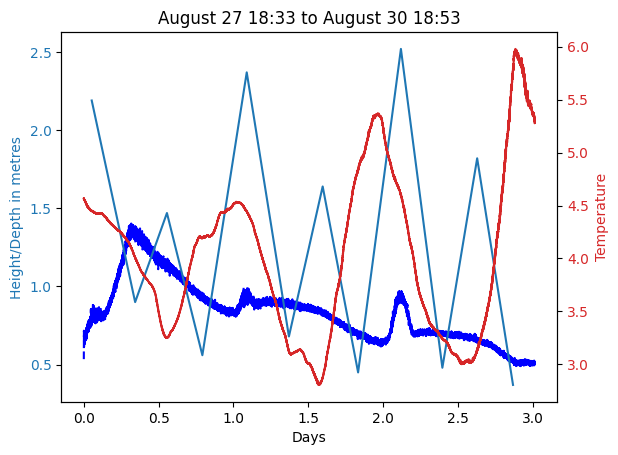

In [9]:
# Creating plot with dataset_1
fig, ax1 = plt.subplots()
 
color = 'tab:blue'
ax1.set_xlabel('Days')
ax1.set_ylabel('Height/Depth in metres', color = color)
ax1.plot(pressure_days, pressure_data['depth'], 'b--', label = 'depth')
ax1.plot(tidal_data_trunc['Days'], tidal_data_trunc['Height(cm)']/100.0, label = 'tides', color=color)
ax1.tick_params(axis ='y', labelcolor = color)
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()
 
color = 'tab:red'
ax2.set_ylabel('Temperature', color = color)
ax2.plot(temp_days, temp_data['temp'], color = color)
ax2.tick_params(axis ='y', labelcolor = color)
 
# Adding title
plt.title('August 27 18:33 to August 30 18:53')
 
# Show plot
plt.show()